In [59]:
import sys
# sys.path.append(r"Y:\Users\Yingyue\Gates_Lab_Suite-master")
sys.path.append(r"/Volumes/funkflower/Users/Yingyue/Gates_Lab_Suite-master")
from Core_Definition import *
from Auto_Algorithm import *
from Visualization import *
import os
from SPAM import *
import numpy as np
import xlsxwriter as xlsx
from scipy import optimize
import random
import math
from math import floor
import pickle
import uuid

In [60]:
import json, pickle
import qiskit
#transpiler reducinig qiskit circuit to QASM strings
from qiskit import transpile
# Use AerSimulator
from qiskit_aer import AerSimulator
from qiskit import IBMQ, QuantumCircuit, execute
# from qiskit.providers.ibmq.managed import IBMQJobManager
from qiskit.extensions import UnitaryGate
from qiskit.quantum_info import Pauli, Clifford, Statevector,Operator
from qiskit.visualization import array_to_latex
from scipy.stats import sem, unitary_group
from scipy.linalg import sqrtm,expm
import qiskit.quantum_info as qi
from qiskit.quantum_info import Pauli
import pylatexenc
import itertools

In [61]:


def map_statepop_2_ibm_mapping_no_ancilla(counts,n):
    counts_ibm_mapping=[0 for i in range (2**(n))]
    idx_ibm_mapping=[]
    counts_ibm_mapping_dic={}
    if len(str(n))<2:
        f="00"+str(n)+"b"
    elif len(str(n))<3:
        f="0"+str(n)+"b"
    else:
        raise ValueError("n is too big")
    for gates_idx in range (2**(n)):
        gates_idx_str=format(gates_idx,f)
        ibm_idx=0
        for i in range (n):
            ibm_idx+=2**(i)*int(gates_idx_str[i])
        ibm_idx_str=format(ibm_idx,f)
#         idx_ibm_mapping.append(ibm_idx_str)
        counts_ibm_mapping[ibm_idx]=counts[gates_idx]
        counts_ibm_mapping_dic[ibm_idx_str]=counts[gates_idx]
    return counts_ibm_mapping, counts_ibm_mapping_dic
        


In [62]:
Set_Mapping([4,5,3,2,1,])
nqubit=2
C=20
all_circuits={}
depth=[2,4,8,16,32,40]

load circuits and save them into a dictionary with the following stucture:
all_circuits={}
              -XX
                  -2=[list]
                  -8=[list]
                  -32=[list]
              -XY
                  -2
                  -8
                  -32
              ...

load all data file name into a dictionary
all_data={}
              -XX
                  -2=[list of data filenames]
                  -8=[list of data filenames]
                  -32=[list of data filenames]
              -XY
                  -2
                  -8
                  -32
              ...

load circuit

In [63]:
pauli_sample_list = [''.join(s) for s in itertools.product(['X','Y','Z'], repeat = nqubit)]
circ_path="/Volumes/funkflower/Users/Yingyue/Gates_Lab_Suite-master/PauliNoiseEstimation/circuits/CBFTXX45/"

for pauli in pauli_sample_list:
    all_circuits[pauli]={}
    for d in depth:
        all_circuits[pauli][d]=[]

for f in os.listdir(circ_path):
    if (f.find(".txt")!=-1):
        n=f.find("_")
        n1=f.find(".")
        Plabel=f[n-2:n]
#         print(Plabel)
        dlabel=f[n+3:n1]
#         print (dlabel)x
        file=open(circ_path+f)
        Lines= file.readlines()
#         c_d8=[]
        count = 0
        for line in Lines:
            all_circuits[Plabel][int(dlabel)].append(line)
            count += 1
#         print (count)
#         count=0

    
print (all_circuits["XY"][2])
            

['RY+42:RY+52:AZ4+1.0000:RX+51:FTXA450.2500+:RX+41:AZ5+1.0000:FTXA450.2500+:RX+41:RY-42:RY-52\n', 'RY+42:RY+52:AZ4+1.0000:RX+51:FTXA450.2500+:AZ4+1.0000:AZ5+1.0000:FTXA450.2500+:RX+41:RX+51:RY-42:RY-52\n', 'RY+42:RY+52:RY+41:RX+51:FTXA450.2500+:RY+41:AZ5+1.0000:FTXA450.2500+:RX+41:RY+51:RY-42:RY-52\n', 'RY+42:RY+52:AZ4+1.0000:RX+51:FTXA450.2500+:RX+41:RX+51:FTXA450.2500+:RY+41:RY+51:RY-42:RY-52\n', 'RY+42:RY+52:RX+41:AZ5+1.0000:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:AZ4+1.0000:RY+51:RY-42:RY-52\n', 'RY+42:RY+52:AZ4+1.0000:RY+51:FTXA450.2500+:RY+41:AZ5+1.0000:FTXA450.2500+:AZ4+1.0000:RY+51:RY-42:RY-52\n', 'RY+42:RY+52:RX+41:RY+51:FTXA450.2500+:RX+41:FTXA450.2500+:RX+51:RY-42:RY-52\n', 'RY+42:RY+52:RY+41:FTXA450.2500+:FTXA450.2500+:RX+51:RY-42:RY-52\n', 'RY+42:RY+52:RY+41:RY+51:FTXA450.2500+:RX+51:FTXA450.2500+:AZ4+1.0000:AZ5+1.0000:RY-42:RY-52\n', 'RY+42:RY+52:RY+41:AZ5+1.0000:FTXA450.2500+:RX+41:AZ5+1.0000:FTXA450.2500+:RY-42:RY-52\n', 'RY+42:RY+52:AZ4+1.0000:FTXA450.2500+:AZ4+1.0000:

load data from 0227 for comparison

In [79]:
data_path="/Volumes/funkflower/Users/Yingyue/Gates_Lab_Suite-master/PauliNoiseEstimation/data/CB_FTXX45_alldata/"
all_datafile={}
all_datafile_ordered={}

for pauli in pauli_sample_list:
    all_datafile[pauli]={}
    for d in depth:
        all_datafile[pauli][d]=[]
for pauli in pauli_sample_list:
    all_datafile_ordered[pauli]={}
    for d in depth:
        all_datafile_ordered[pauli][d]=[]

for folder in os.listdir(data_path):
    if folder!=".DS_Store":
        for folder2 in os.listdir(data_path+folder+"/"):
            if folder2=="2" or folder2=="8" or folder2=="16" or folder2=="32" or folder2=="40":
                for f in os.listdir(data_path+folder+"/"+folder2+"/"):
                    if f!=".DS_Store":
                        all_datafile[folder][int(folder2)].append(f)
#                 print (len(all_datafile[folder][int(folder2)]))
# print (all_datafile)  
L1=[]
line_Idx="000"
line_num=""
p=0 #position indicator
for pauli in pauli_sample_list:
    for d in depth:
        for f in all_datafile[pauli][d]:
#             print (f)
            if (f.find("Line")!=-1):
                n=f.find("_")
                line_Idx=f[n+6:n+9]
                for i in range(3):
                    if line_Idx[i]=="0":
                        p+=1
                    else:
                        line_num=line_Idx[p:3]
                        p=0
                        break
                L1.append(int(line_num))
            else:
                print (f) #print out non datafiles just for debugging 
                continue
        # print (L1)
        # print (all_datafile[pauli][d])
        for Idx in range (len(all_datafile[pauli][d])):
            for i in range (len(all_datafile[pauli][d])):
                # print (i)
                if L1[i]==Idx+1:
                    all_datafile_ordered[pauli][d].append(all_datafile[pauli][d][i])
                    break
        L1=[]
        line_Idx="000"
        line_num=""
        p=0 #position indicator
all_datafile_ordered_0227=all_datafile_ordered.copy()
data_path_0227=data_path

In [80]:
data_path="/Volumes/funkflower/Labs/Gates/Data/2024/202403/20240301/CB_FTXX45_0301_all_data/"
all_datafile={}
all_datafile_ordered={}

for pauli in pauli_sample_list:
    all_datafile[pauli]={}
    for d in depth:
        all_datafile[pauli][d]=[]
for pauli in pauli_sample_list:
    all_datafile_ordered[pauli]={}
    for d in depth:
        all_datafile_ordered[pauli][d]=[]

for folder in os.listdir(data_path):
    if folder!=".DS_Store":
        for folder2 in os.listdir(data_path+folder+"/"):
            if folder2=="2" or folder2=="8" or folder2=="16" or folder2=="32" or folder2=="40":
                for f in os.listdir(data_path+folder+"/"+folder2+"/"):
                    if f!=".DS_Store":
                        all_datafile[folder][int(folder2)].append(f)
                        # print (f)
#                 print (len(all_datafile[folder][int(folder2)]))
# print (all_datafile)  
L1=[]
line_Idx="000"
line_num=""
p=0 #position indicator
for pauli in pauli_sample_list:
    for d in depth:
        for f in all_datafile[pauli][d]:
#             print (f)
            if (f.find("Line")!=-1):
                n=f.find("_")
                line_Idx=f[n+6:n+9]
                for i in range(3):
                    if line_Idx[i]=="0":
                        p+=1
                    else:
                        line_num=line_Idx[p:3]
                        p=0
                        break
                L1.append(int(line_num))
                # print (line_num)
            else:
                print (f) #print out non datafiles just for debugging 
                continue
        # print (L1)
        # print (all_datafile[pauli][d])
        for Idx in range (len(all_datafile[pauli][d])):
            for i in range (len(L1)):
                # print (i)
                # print (L1)
                if L1[i]==Idx+1:
                    all_datafile_ordered[pauli][d].append(all_datafile[pauli][d][i])
                    break
        L1=[]
        line_Idx="000"
        line_num=""
        p=0 #position indicator

In [81]:
# a=Quantum_State(5)

a_s=Quantum_State(5)
b_c=Quantum_Circuit(5,"qc")

a_2=Quantum_State(5)
# a_2=Quantum_State(5)

# spam1=SPAM_Operator(5)
# spam1.Import("/Volumes/funkflower/Users/Yingyue/Gates_Lab_Suite-master/PauliNoiseEstimation/data/0711/SPAM1/SPAM1.csv")

# spam2=SPAM_Operator(5)
# spam2.Import("/Volumes/funkflower/Users/Yingyue/Gates_Lab_Suite-master/PauliNoiseEstimation/data/0711/SPAM2/SPAM2.csv")


['2024-02-27-185835_Line_001.txt', '2024-02-27-185919_Line_002.txt', '2024-02-27-190002_Line_003.txt', '2024-02-27-190045_Line_004.txt', '2024-02-27-190126_Line_005.txt', '2024-02-27-192049_Line_006.txt', '2024-02-27-191700_Line_007.txt', '2024-02-27-191741_Line_008.txt', '2024-02-27-191823_Line_009.txt', '2024-02-27-191905_Line_010.txt']
2024-03-01-113129_Line_001.txt
RY+42:RY+52:RY+41:RX+51:FTXA450.2500+:RY+51:FTXA450.2500+:AZ5+1.0000:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:AZ4+1.0000:RX+51:FTXA450.2500+:RY+41:RY+51:FTXA450.2500+:RY+41:AZ5+1.0000:FTXA450.2500+:FTXA450.2500+:RY+41:AZ5+1.0000:FTXA450.2500+:RX+41:RX+51:FTXA450.2500+:RX+51:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:RY+41:AZ5+1.0000:FTXA450.2500+:RX+51:FTXA450.2500+:AZ4+1.0000:RY+51:FTXA450.2500+:RX+41:AZ5+1.0000:FTXA450.2500+:RY+41:AZ5+1.0000:RY-42:RY-52

2024-02-27-185835_Line_001.txt


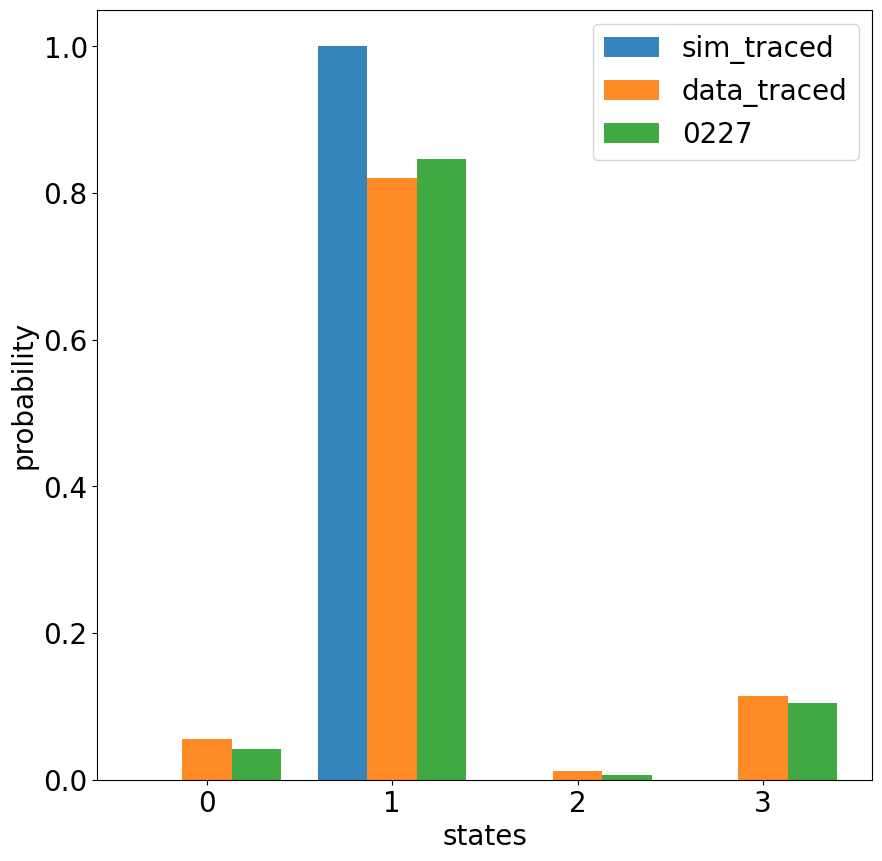

2024-03-01-113212_Line_002.txt
RY+42:RY+52:RY+41:FTXA450.2500+:FTXA450.2500+:FTXA450.2500+:RX+41:RX+51:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:RY+41:RY+51:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:RY+41:RY+51:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:RY+41:RX+51:FTXA450.2500+:RX+41:RX+51:FTXA450.2500+:AZ4+1.0000:FTXA450.2500+:RY+51:FTXA450.2500+:AZ4+1.0000:RY+51:FTXA450.2500+:AZ4+1.0000:RY+51:FTXA450.2500+:AZ4+1.0000:RY+51:FTXA450.2500+:RX+41:RY-42:RY-52

2024-02-27-185919_Line_002.txt


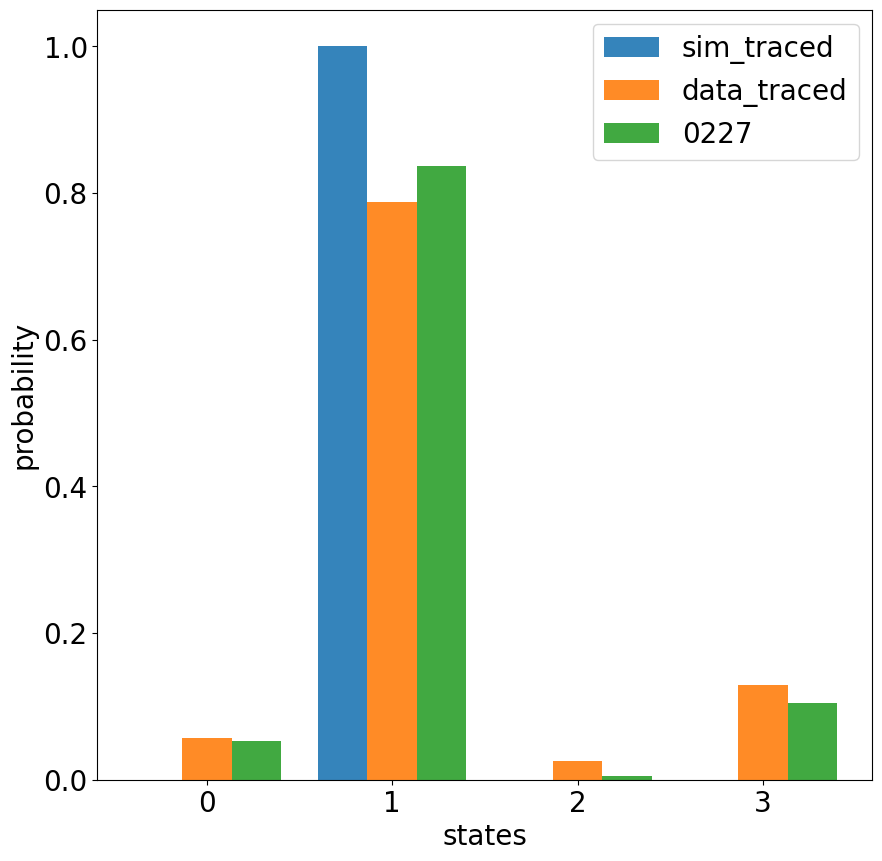

2024-03-01-113254_Line_003.txt
RY+42:RY+52:RX+41:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:AZ4+1.0000:AZ5+1.0000:FTXA450.2500+:RX+41:AZ5+1.0000:FTXA450.2500+:RY+41:FTXA450.2500+:AZ4+1.0000:RY+51:FTXA450.2500+:RY+41:RY+51:FTXA450.2500+:RY+41:AZ5+1.0000:FTXA450.2500+:RY+41:AZ5+1.0000:FTXA450.2500+:RY+41:RY+51:FTXA450.2500+:AZ4+1.0000:FTXA450.2500+:AZ4+1.0000:RX+51:FTXA450.2500+:RY+51:FTXA450.2500+:RY+41:RX+51:FTXA450.2500+:AZ4+1.0000:RX+51:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:AZ4+1.0000:RY-42:RY-52

2024-02-27-190002_Line_003.txt


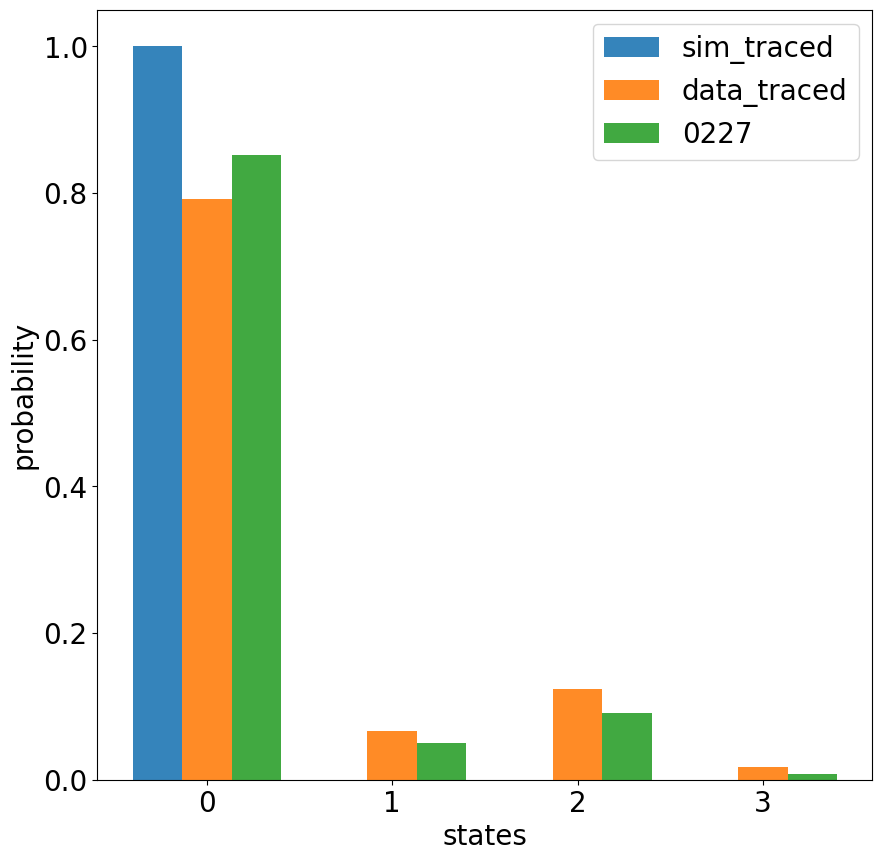

2024-03-01-113337_Line_004.txt
RY+42:RY+52:RX+41:AZ5+1.0000:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:RX+41:AZ5+1.0000:FTXA450.2500+:RY+51:FTXA450.2500+:AZ4+1.0000:FTXA450.2500+:RX+51:FTXA450.2500+:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:RY+41:RY+51:FTXA450.2500+:RY+41:RY+51:FTXA450.2500+:RX+51:FTXA450.2500+:FTXA450.2500+:RX+41:AZ5+1.0000:FTXA450.2500+:RY+41:RX+51:FTXA450.2500+:AZ4+1.0000:AZ5+1.0000:FTXA450.2500+:RY+41:RY+51:FTXA450.2500+:RX+41:RX+51:RY-42:RY-52

2024-02-27-190045_Line_004.txt


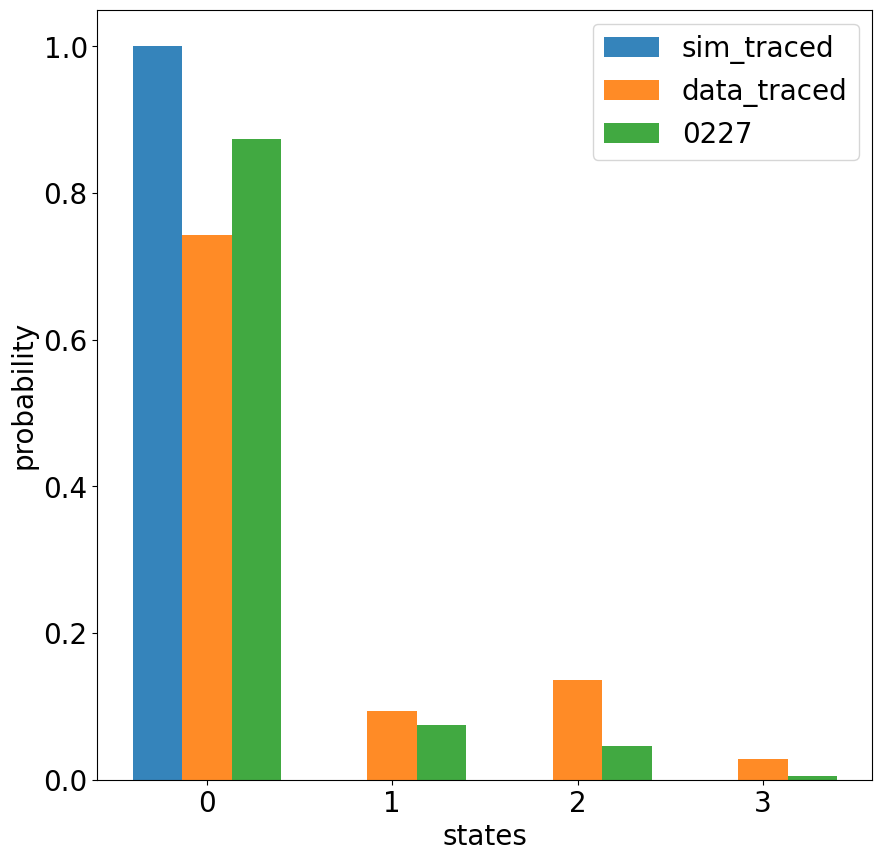

2024-03-01-113417_Line_005.txt
RY+42:RY+52:AZ4+1.0000:AZ5+1.0000:FTXA450.2500+:FTXA450.2500+:RY+41:FTXA450.2500+:RX+51:FTXA450.2500+:RX+41:FTXA450.2500+:AZ4+1.0000:AZ5+1.0000:FTXA450.2500+:RY+41:AZ5+1.0000:FTXA450.2500+:RX+41:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:AZ5+1.0000:FTXA450.2500+:RY+41:RY+51:FTXA450.2500+:RX+41:AZ5+1.0000:FTXA450.2500+:AZ4+1.0000:FTXA450.2500+:AZ4+1.0000:AZ5+1.0000:FTXA450.2500+:RX+51:FTXA450.2500+:AZ5+1.0000:FTXA450.2500+:AZ4+1.0000:AZ5+1.0000:RY-42:RY-52

2024-02-27-190126_Line_005.txt


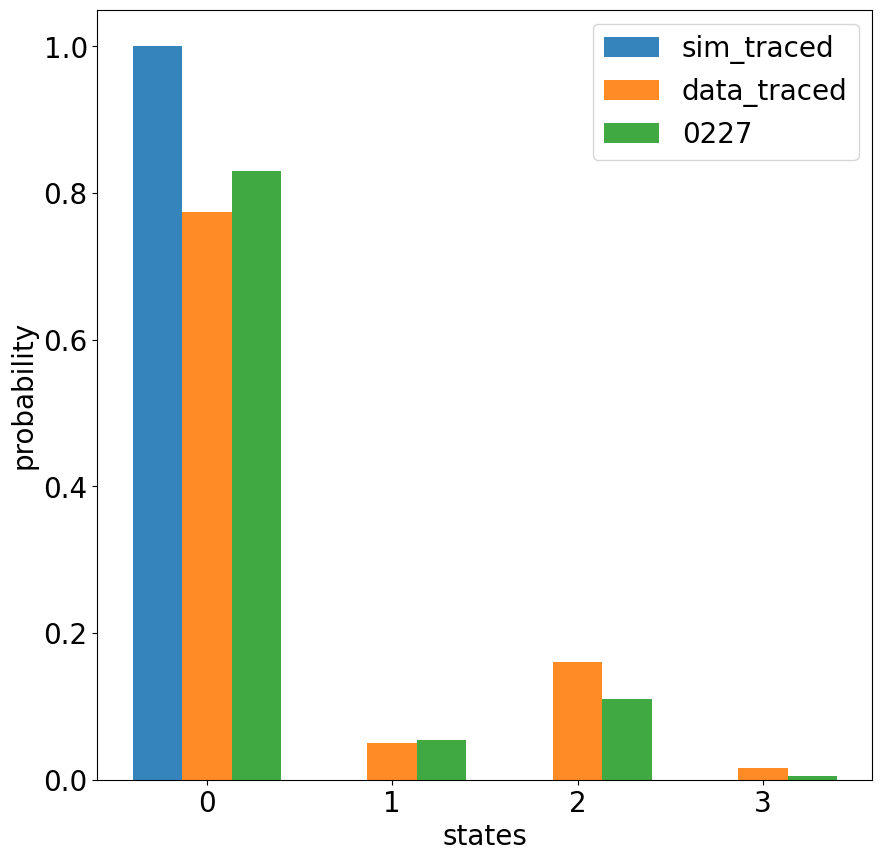

2024-03-01-113517_Line_006.txt
RY+42:RY+52:RY+51:FTXA450.2500+:RY+41:AZ5+1.0000:FTXA450.2500+:AZ4+1.0000:RX+51:FTXA450.2500+:RX+41:RX+51:FTXA450.2500+:AZ4+1.0000:FTXA450.2500+:AZ4+1.0000:RY+51:FTXA450.2500+:FTXA450.2500+:AZ4+1.0000:RY+51:FTXA450.2500+:RY+41:RY+51:FTXA450.2500+:RY+41:RY+51:FTXA450.2500+:AZ4+1.0000:AZ5+1.0000:FTXA450.2500+:AZ4+1.0000:AZ5+1.0000:FTXA450.2500+:RX+41:AZ5+1.0000:FTXA450.2500+:RY+41:FTXA450.2500+:FTXA450.2500+:AZ4+1.0000:RY+51:FTXA450.2500+:AZ4+1.0000:AZ5+1.0000:RY-42:RY-52

2024-02-27-192049_Line_006.txt


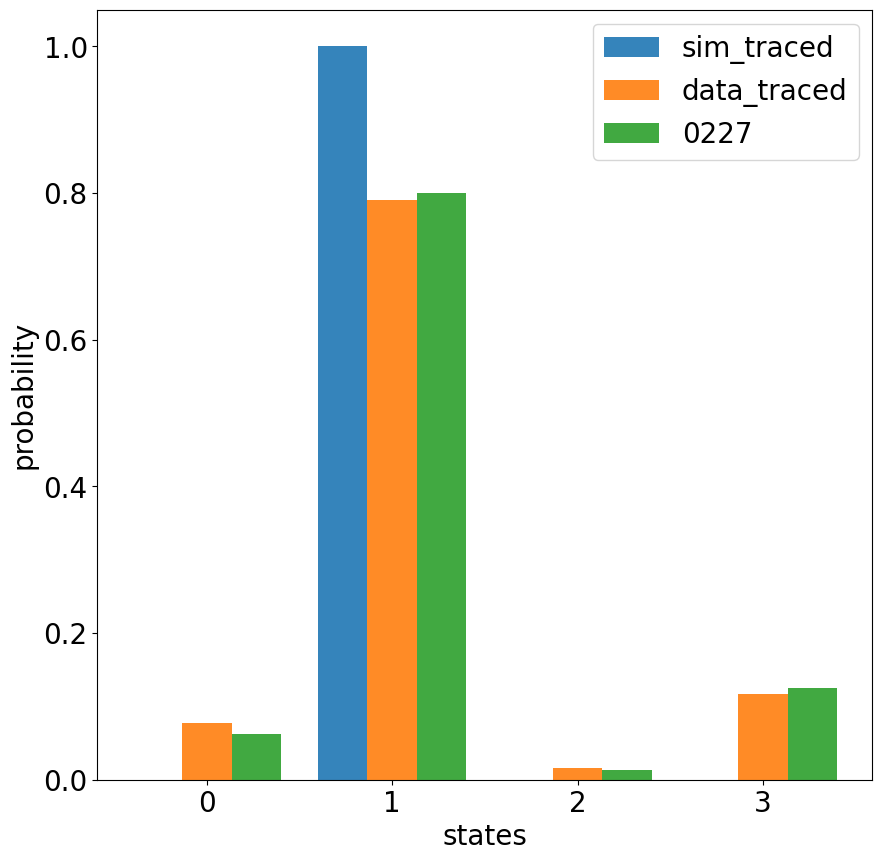

2024-03-01-113558_Line_007.txt
RY+42:RY+52:RX+41:AZ5+1.0000:FTXA450.2500+:RY+41:FTXA450.2500+:RX+41:AZ5+1.0000:FTXA450.2500+:RX+41:RX+51:FTXA450.2500+:RX+41:RX+51:FTXA450.2500+:RX+41:FTXA450.2500+:RY+41:RX+51:FTXA450.2500+:RX+41:RX+51:FTXA450.2500+:AZ4+1.0000:RY+51:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:RX+51:FTXA450.2500+:RY+41:FTXA450.2500+:RY+51:FTXA450.2500+:FTXA450.2500+:AZ4+1.0000:RX+51:FTXA450.2500+:FTXA450.2500+:AZ4+1.0000:AZ5+1.0000:RY-42:RY-52

2024-02-27-191700_Line_007.txt


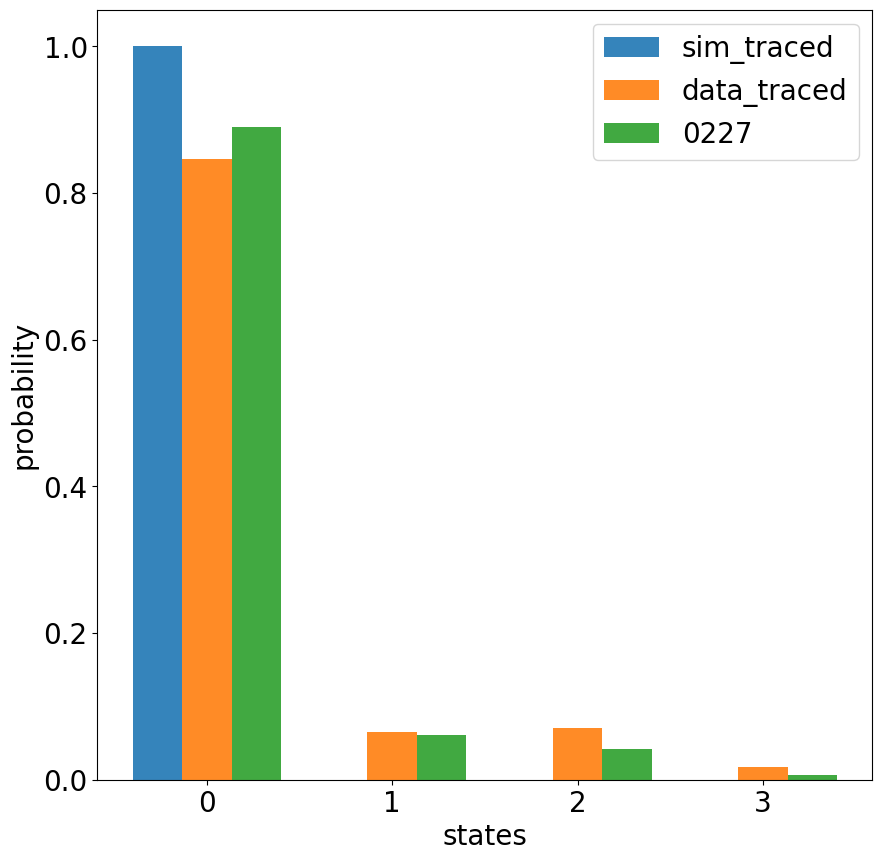

2024-03-01-113640_Line_008.txt
RY+42:RY+52:AZ4+1.0000:AZ5+1.0000:FTXA450.2500+:AZ4+1.0000:AZ5+1.0000:FTXA450.2500+:FTXA450.2500+:RY+41:RY+51:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:RX+41:AZ5+1.0000:FTXA450.2500+:AZ4+1.0000:RY+51:FTXA450.2500+:RY+41:AZ5+1.0000:FTXA450.2500+:RX+51:FTXA450.2500+:RY+51:FTXA450.2500+:AZ4+1.0000:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:FTXA450.2500+:AZ4+1.0000:RY+51:FTXA450.2500+:AZ4+1.0000:FTXA450.2500+:AZ4+1.0000:RX+51:FTXA450.2500+:RY+41:RY-42:RY-52

2024-02-27-191741_Line_008.txt


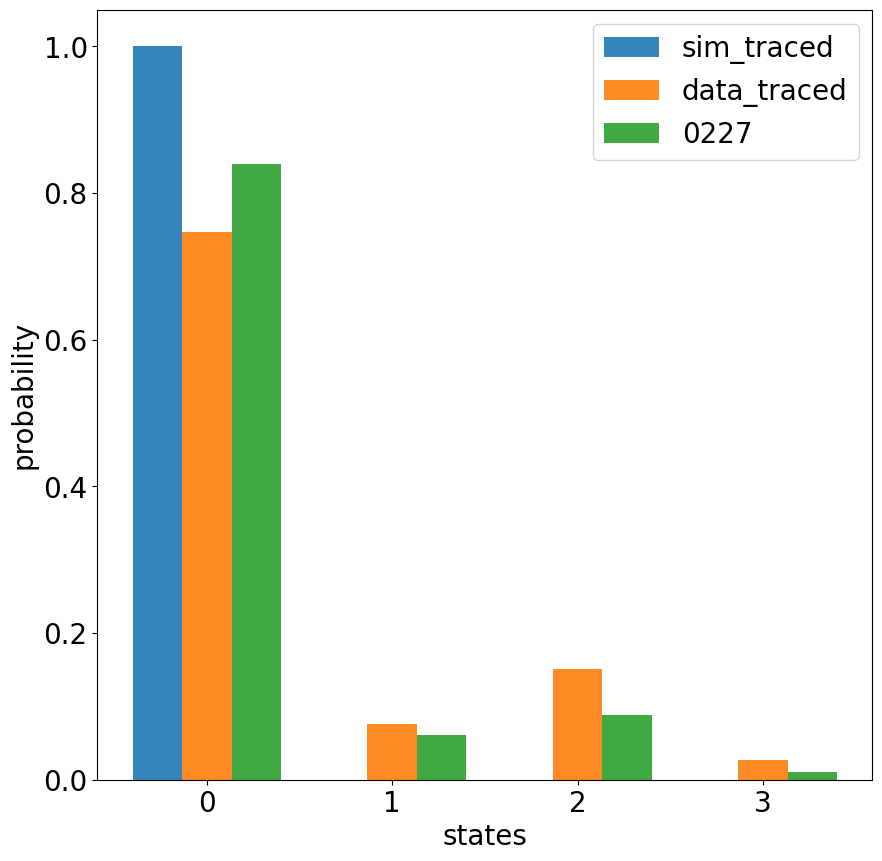

2024-03-01-113721_Line_009.txt
RY+42:RY+52:RY+41:FTXA450.2500+:AZ4+1.0000:FTXA450.2500+:RY+41:FTXA450.2500+:RY+41:RY+51:FTXA450.2500+:RY+41:RX+51:FTXA450.2500+:RX+51:FTXA450.2500+:AZ5+1.0000:FTXA450.2500+:AZ5+1.0000:FTXA450.2500+:RY+41:RX+51:FTXA450.2500+:RX+51:FTXA450.2500+:RX+41:AZ5+1.0000:FTXA450.2500+:RX+41:AZ5+1.0000:FTXA450.2500+:RX+41:AZ5+1.0000:FTXA450.2500+:AZ4+1.0000:FTXA450.2500+:AZ4+1.0000:AZ5+1.0000:FTXA450.2500+:RX+41:AZ5+1.0000:FTXA450.2500+:RX+41:AZ5+1.0000:RY-42:RY-52

2024-02-27-191823_Line_009.txt


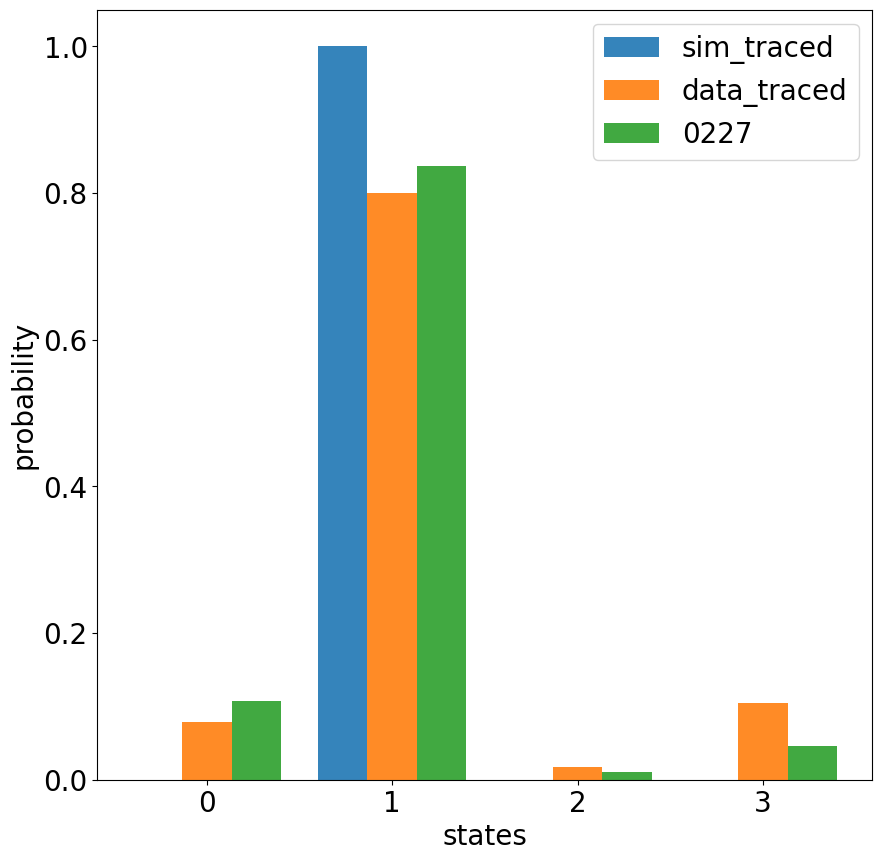

2024-03-01-113802_Line_010.txt
RY+42:RY+52:RY+51:FTXA450.2500+:RX+51:FTXA450.2500+:AZ4+1.0000:FTXA450.2500+:AZ4+1.0000:FTXA450.2500+:AZ4+1.0000:RX+51:FTXA450.2500+:RY+41:RX+51:FTXA450.2500+:RX+41:AZ5+1.0000:FTXA450.2500+:RX+41:RX+51:FTXA450.2500+:RX+41:FTXA450.2500+:AZ4+1.0000:RX+51:FTXA450.2500+:RX+51:FTXA450.2500+:RY+41:RX+51:FTXA450.2500+:AZ4+1.0000:AZ5+1.0000:FTXA450.2500+:AZ4+1.0000:AZ5+1.0000:FTXA450.2500+:RY+41:AZ5+1.0000:FTXA450.2500+:AZ4+1.0000:AZ5+1.0000:FTXA450.2500+:RY+51:RY-42:RY-52

2024-02-27-191905_Line_010.txt


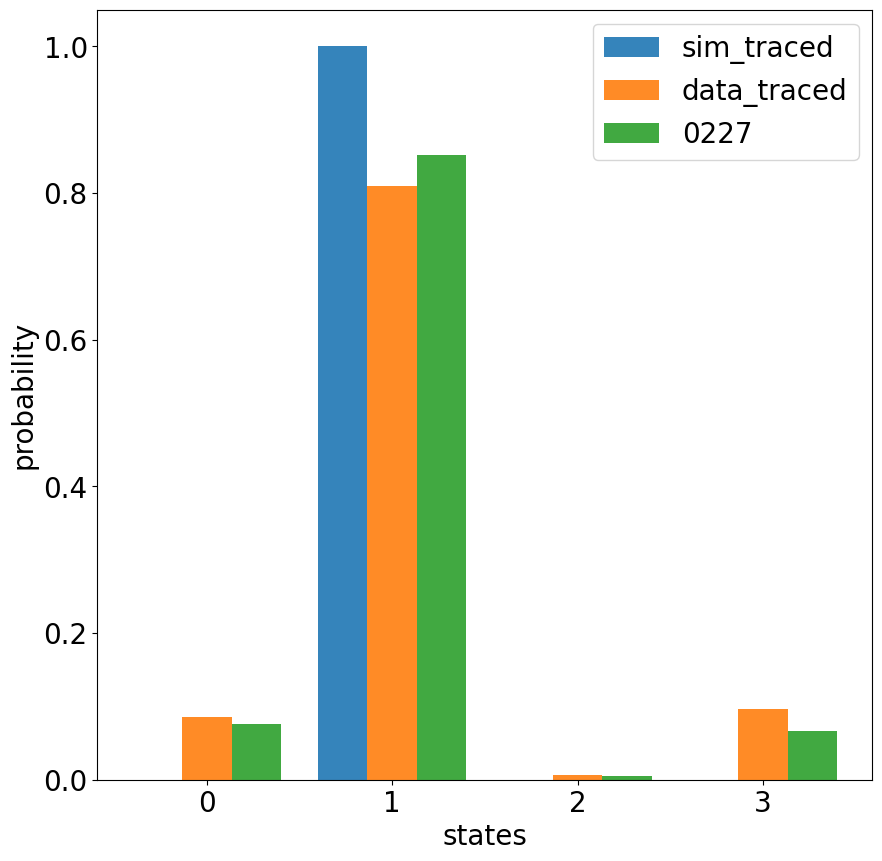

2024-03-01-165904_Line_011.txt
RY+42:RY+52:FTXA450.2500+:RX+41:RX+51:FTXA450.2500+:RX+51:FTXA450.2500+:AZ4+1.0000:AZ5+1.0000:FTXA450.2500+:RX+41:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:AZ4+1.0000:AZ5+1.0000:FTXA450.2500+:AZ5+1.0000:FTXA450.2500+:AZ5+1.0000:FTXA450.2500+:RY+41:RY+51:FTXA450.2500+:RY+41:RY+51:FTXA450.2500+:AZ5+1.0000:FTXA450.2500+:RX+41:RX+51:FTXA450.2500+:RY+41:FTXA450.2500+:RY+51:FTXA450.2500+:AZ4+1.0000:AZ5+1.0000:FTXA450.2500+:AZ4+1.0000:AZ5+1.0000:RY-42:RY-52



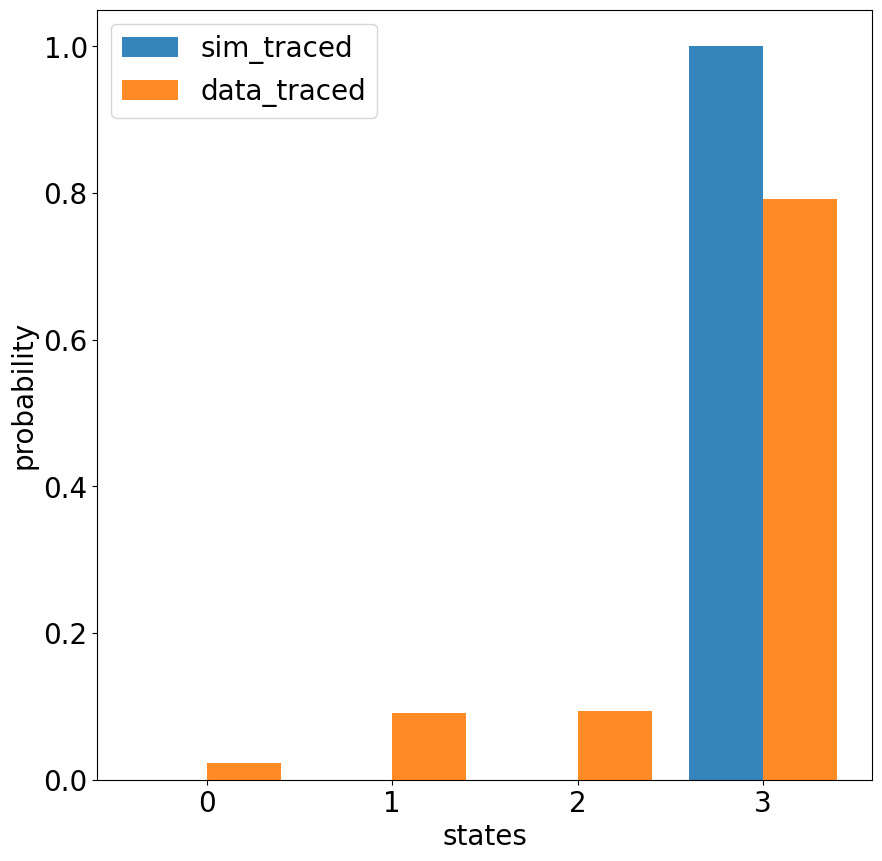

2024-03-01-165953_Line_012.txt
RY+42:RY+52:RX+41:RY+51:FTXA450.2500+:AZ4+1.0000:RX+51:FTXA450.2500+:RX+51:FTXA450.2500+:RY+41:RX+51:FTXA450.2500+:RX+41:RX+51:FTXA450.2500+:AZ5+1.0000:FTXA450.2500+:RX+41:AZ5+1.0000:FTXA450.2500+:RY+51:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:RX+41:AZ5+1.0000:FTXA450.2500+:AZ5+1.0000:FTXA450.2500+:AZ5+1.0000:FTXA450.2500+:RX+41:FTXA450.2500+:AZ4+1.0000:RX+51:FTXA450.2500+:AZ4+1.0000:RY+51:FTXA450.2500+:RY+41:RX+51:FTXA450.2500+:RX+41:RX+51:RY-42:RY-52



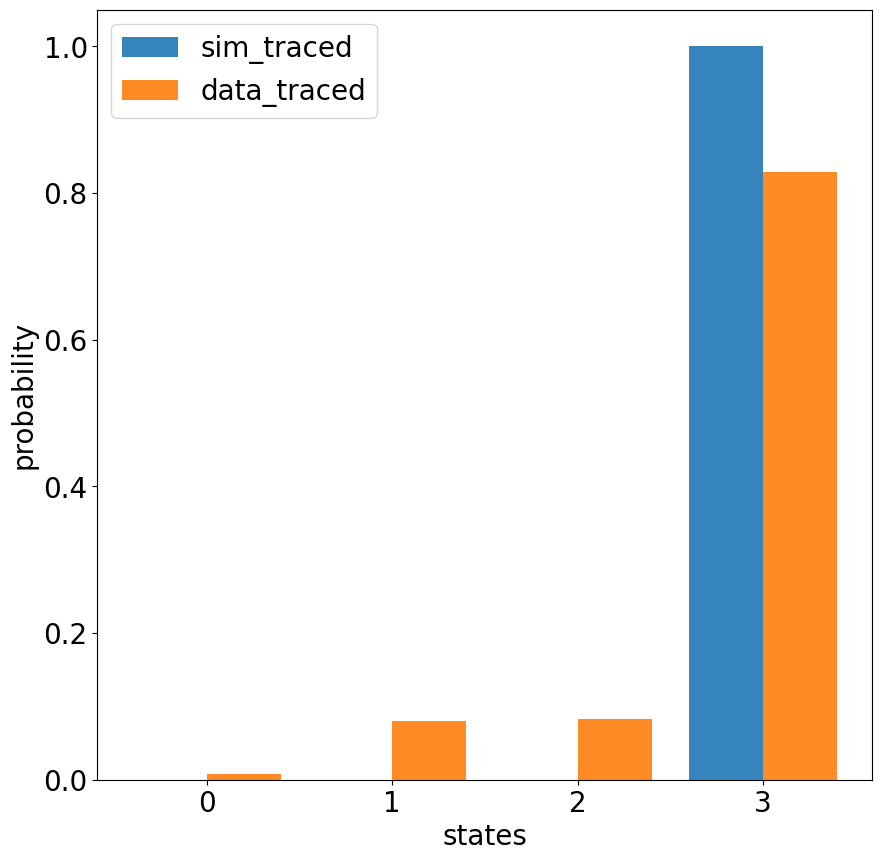

2024-03-01-170043_Line_013.txt
RY+42:RY+52:RY+41:RX+51:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:RY+51:FTXA450.2500+:AZ4+1.0000:AZ5+1.0000:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:RX+41:AZ5+1.0000:FTXA450.2500+:RY+41:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:FTXA450.2500+:RY+41:RX+51:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:RX+51:FTXA450.2500+:RX+41:AZ5+1.0000:FTXA450.2500+:AZ4+1.0000:AZ5+1.0000:FTXA450.2500+:RY+41:RY+51:FTXA450.2500+:RX+41:RX+51:FTXA450.2500+:RX+41:RY+51:RY-42:RY-52



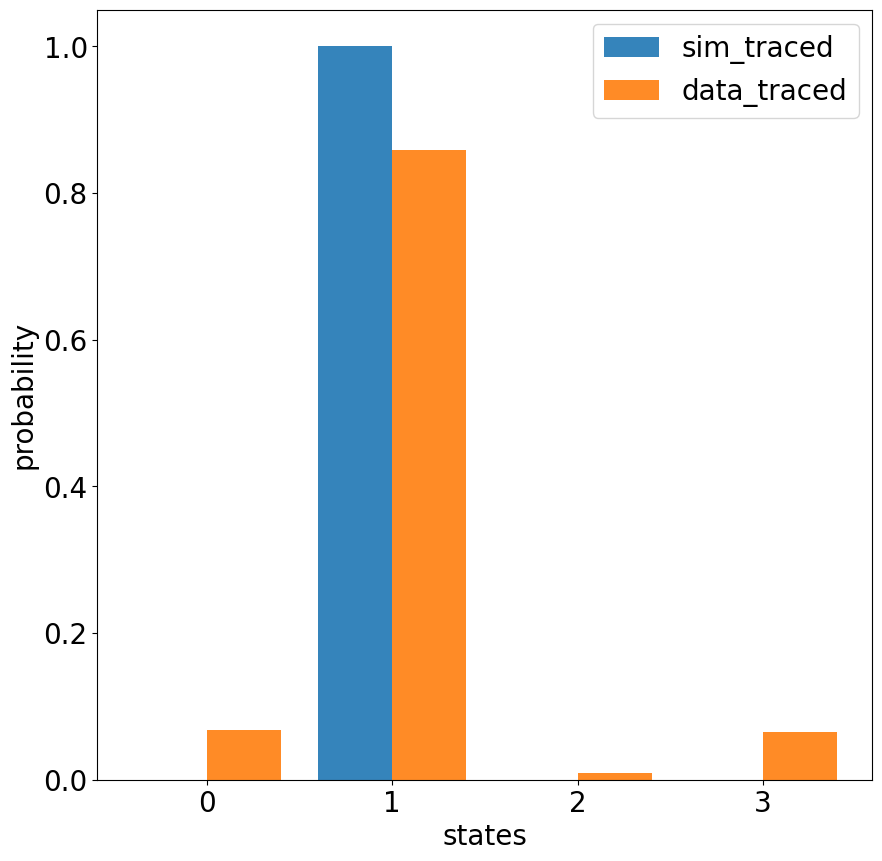

2024-03-01-170132_Line_014.txt
RY+42:RY+52:RY+41:AZ5+1.0000:FTXA450.2500+:RY+41:RY+51:FTXA450.2500+:FTXA450.2500+:AZ4+1.0000:FTXA450.2500+:RY+51:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:RY+51:FTXA450.2500+:AZ4+1.0000:FTXA450.2500+:AZ5+1.0000:FTXA450.2500+:AZ5+1.0000:FTXA450.2500+:RX+41:RX+51:FTXA450.2500+:FTXA450.2500+:AZ4+1.0000:AZ5+1.0000:FTXA450.2500+:RY+41:RY+51:FTXA450.2500+:RY+41:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:RX+41:RX+51:RY-42:RY-52



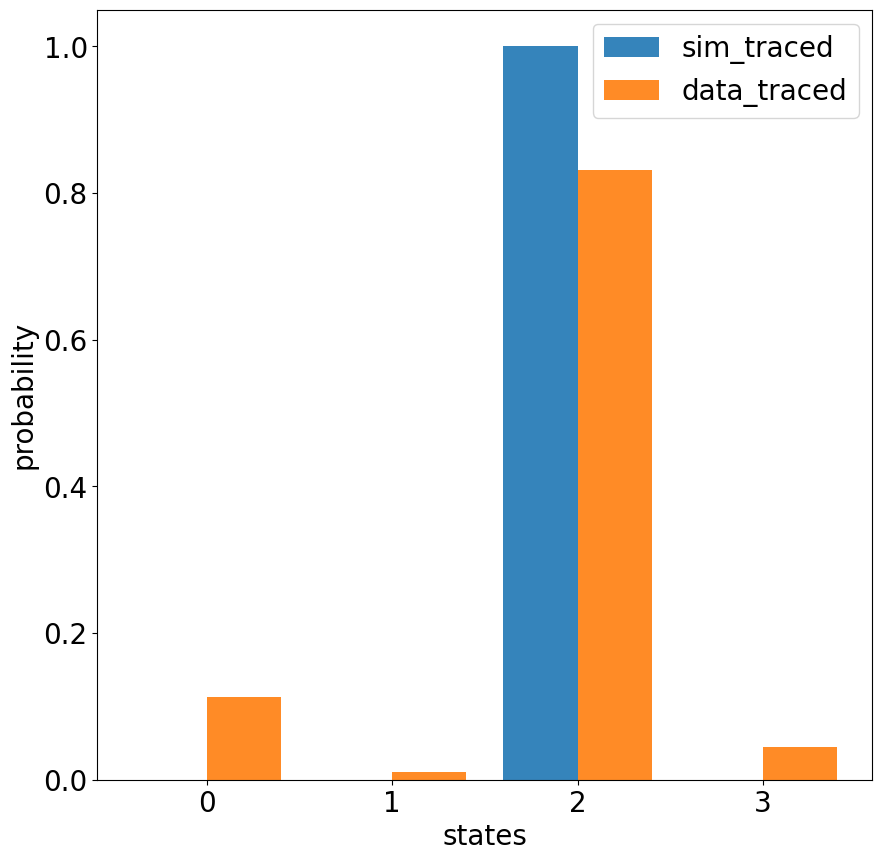

In [84]:
filenames_data=[]
circuit=[]

# counts_d2=[]
# counts_d2_spam=[]
# counts_d2_sim=[]
# shots=2000
# counts=[]
# counts_spam=[]
# counts_sim=[]

PauliLabel="XY"
DepthIndex=16
filenames_data=all_datafile_ordered[PauliLabel][DepthIndex]
filenames_data_0227=all_datafile_ordered_0227[PauliLabel][DepthIndex]
print (filenames_data_0227)
# print (len(filenames_data))
paf_data=data_path+PauliLabel+"/"+str(DepthIndex)+"/"
paf_data_0227=data_path_0227+PauliLabel+"/"+str(DepthIndex)+"/"
circuit=all_circuits[PauliLabel][DepthIndex]


for i in range (len(filenames_data)):
    print (filenames_data[i])
    a.Import(paf_data+filenames_data[i],keep_file=True)
    data_traced=Trace_Out(a,[0,1])
#     counts=[round(shots*x) for x in  data_traced.population]
#     print ("counts:", counts)
#     counts_ibm_mapping, counts_ibm_mapping_dic=map_statepop_2_ibm_mapping(counts,nqubit)
#     print ("counts_ibm_mapping_dic:",counts_ibm_mapping_dic)
#     counts_d2.append(counts_ibm_mapping_dic)
    
#     a_s=spam1.Correct_SPAM(a)
#     a_s.Import(paf_data_d8_0703+filenames_d8_0703[i],keep_file=True)
#     data_traced_spam=Trace_Out(a_s,[1,2])
#     counts_spam=[round(shots*x) for x in  data_traced_spam.population]
#     counts_ibm_mapping_spam, counts_ibm_mapping_dic_spam=map_statepop_2_ibm_mapping(counts_spam,nqubit)
#     counts_d2_spam.append(counts_ibm_mapping_dic_spam)
    b_c.Interpret_GatesLab_Sequence(circuit[i])
    print (circuit[i])
    b=b_c.Simulate()
    sim_traced=Trace_Out(b,[0,1])
    if (i<10):
        
        a_2.Import(paf_data_0227+filenames_data_0227[i],keep_file=True)
        print (filenames_data_0227[i])
        a_2_traced=Trace_Out(a_2,[0,1])
        Display_States_Population(states=[sim_traced,data_traced,a_2_traced],label=["sim_traced","data_traced","0227"])

    else:
        
        Display_States_Population(states=[sim_traced,data_traced],label=["sim_traced","data_traced"])


In [77]:
filenames_data=[]
circuit=[]

# counts_d2=[]
# counts_d2_spam=[]
# counts_d2_sim=[]
shots=2000
nqubit=2
counts=[]
# counts_spam=[]
# counts_sim=[]
all_counts={}

pauli_sample_select_list=["XY"]
# paf_data="/Volumes/funkflower/Users/Yingyue/Gates_Lab_Suite-master/PauliNoiseEstimation/data/CB/oct2023alldata/"
for PauliLabel in pauli_sample_select_list:
    all_counts[PauliLabel]={}
    for DepthIndex in depth:
        all_counts[PauliLabel][DepthIndex]=[]
        filenames_data=all_datafile_ordered[PauliLabel][DepthIndex]
        paf_data=data_path
        paf_data+=PauliLabel+"/"+str(DepthIndex)+"/"
        circuit=all_circuits[PauliLabel][DepthIndex]


        for i in range (len(filenames_data)):
            print (filenames_data[i])
            a.Import(paf_data+filenames_data[i],keep_file=True)
            data_traced=Trace_Out(a,[0,1])
            counts=[round(shots*x) for x in  data_traced.population]
            print ("counts:", counts)
            counts_ibm_mapping, counts_ibm_mapping_dic=counts_ibm_mapping, counts_ibm_mapping_dic=map_statepop_2_ibm_mapping_no_ancilla(counts,nqubit)
#             print ("counts_ibm_mapping_dic:",counts_ibm_mapping_dic)
            all_counts[PauliLabel][DepthIndex].append(counts_ibm_mapping_dic)

        #     a_s=spam1.Correct_SPAM(a)
        #     a_s.Import(paf_data_d8_0703+filenames_d8_0703[i],keep_file=True)
        #     data_traced_spam=Trace_Out(a_s,[1,2])
        #     counts_spam=[round(shots*x) for x in  data_traced_spam.population]
        #     counts_ibm_mapping_spam, counts_ibm_mapping_dic_spam=map_statepop_2_ibm_mapping(counts_spam,nqubit)
        #     counts_d2_spam.append(counts_ibm_mapping_dic_spam)

        #     a_0703.Import(paf_data_d2_0703+filenames_d2_0703[i],keep_file=True)
        #     data_0703_traced=Trace_Out(a_0703,[0,1,2,3])

        #     a_rerun.Import(paf_data_d2_rerun+filenames_d2_rerun[i],keep_file=True)
        #     data_rerun_traced=Trace_Out(a_rerun,[0,1,2,3])

#             b_c.Interpret_GatesLab_Sequence(circuit[i])
#             print (circuit[i])
#             b=b_c.Simulate()
#             sim_traced=Trace_Out(b,[1,2])
        #     counts_sim=[round(shots*x) for x in sim_traced.population]
        #     counts_ibm_mapping_sim, counts_ibm_mapping_dic_sim=map_statepop_2_ibm_mapping(counts_sim,nqubit)
        #     counts_d2_sim.append(counts_ibm_mapping_dic_sim)


#             Display_States_Population(states=[b,a],label=["simulation","data"])
        #     Display_States_Population(states=[sim_traced,data_traced,data_0703_traced,data_rerun_traced],label=["sim_traced","data_traced","0703_traced","0711rerun"])
        # #       
print ("done")

2024-03-01-110405_Line_001.txt
counts: [0, 48, 49, 1903]
2024-03-01-110420_Line_002.txt
counts: [60, 1884, 3, 53]
2024-03-01-110435_Line_003.txt
counts: [1928, 30, 40, 2]
2024-03-01-110451_Line_004.txt
counts: [49, 1928, 1, 22]
2024-03-01-110507_Line_005.txt
counts: [0, 40, 40, 1920]
2024-03-01-110541_Line_006.txt
counts: [3, 55, 62, 1880]
2024-03-01-110556_Line_007.txt
counts: [71, 1873, 19, 37]
2024-03-01-110611_Line_008.txt
counts: [71, 3, 1893, 33]
2024-03-01-110626_Line_009.txt
counts: [1921, 19, 60, 0]
2024-03-01-110642_Line_010.txt
counts: [71, 0, 1884, 45]
2024-03-01-112459_Line_001.txt
counts: [20, 196, 109, 1675]
2024-03-01-112525_Line_002.txt
counts: [174, 1689, 28, 109]
2024-03-01-112551_Line_003.txt
counts: [1714, 84, 191, 11]
2024-03-01-112617_Line_004.txt
counts: [147, 6, 1730, 117]
2024-03-01-112643_Line_005.txt
counts: [83, 1781, 6, 130]
2024-03-01-112727_Line_006.txt
counts: [162, 13, 1725, 100]
2024-03-01-112754_Line_007.txt
counts: [5, 137, 98, 1760]
2024-03-01-1128

FileNotFoundError: [Errno 2] No such file or directory: '/Volumes/funkflower/Labs/Gates/Data/2024/202403/20240301/CB_FTXX45_0301_all_data/XY/8/archive'

In [14]:
# filename = 'Oct2023_CB_rawdata_counts'
# token = ''.join(random.choice([str(j) for j in range(10)]) for i in range(10))
# filename += '_' + token
# with open('/Volumes/funkflower/Users/Yingyue/Gates_Lab_Suite-master/PauliNoiseEstimation/data/CB/oct2023counts/' + filename, 'wb') as outfile:
#     pickle.dump(all_counts, outfile)
# print (filename)

In [15]:
# with open("/Volumes/funkflower/Users/Yingyue/Gates_Lab_Suite-master/PauliNoiseEstimation/data/CB/oct2023counts/Oct2023_CB_rawdata_counts_2428796181", "rb") as fp:   # Unpickling
#     cb_counts = pickle.load(fp)


In [18]:
import copy
from copy import copy, deepcopy
with open("/Volumes/funkflower/Users/Yingyue/Gates_Lab_Suite-master/PauliNoiseEstimation/circuits/CB/XX 10102023/sim_cb_cnot_2023sep_9718455994", "rb") as fp:   # Unpickling
    cb_load = pickle.load(fp)

cb_load_cpy=deepcopy(cb_load)
# eab_load_cpy_spam=deepcopy(eab_load[0:100])
print (cb_load["XX"]["result"][21])

AttributeError: 'CircuitInstruction' object has no attribute '_legacy_format_cache'

In [ ]:
import itertools
nqubit=2
pauli_sample_list = [''.join(s) for s in itertools.product(['X','Y','Z'], repeat = nqubit)]
for PauliLabel in pauli_sample_list:
    cb_load_cpy[PauliLabel]["result"]=cb_load_cpy[PauliLabel]["result"][0:20]+cb_load_cpy[PauliLabel]["result"][40:60]+cb_load_cpy[PauliLabel]["result"][80:100]

In [ ]:
print (cb_load_cpy["XX"])

In [ ]:
C=20
depth=[2,8,32]
for PauliLabel in pauli_sample_list:
    for j in range (len(depth)):
        for i in range (C*j, C*(j+1)):
            print (cb_load_cpy[PauliLabel]["result"][i]["L"])
            if j ==0:
                assert cb_load_cpy[PauliLabel]["result"][i]["L"]==2
            if j ==1:
                assert cb_load_cpy[PauliLabel]["result"][i]["L"]==8
            if j ==2:
                assert cb_load_cpy[PauliLabel]["result"][i]["L"]==32
            print (cb_load_cpy[PauliLabel]["result"][i]["counts"])
            print (cb_counts[PauliLabel][depth[j]][i-C*j])

#             print (counts_d2[i].copy())
            print ("\n")
            cb_load_cpy[PauliLabel]["result"][i]["counts"]=cb_counts[PauliLabel][depth[j]][i-C*j]



{'00': 2000, '10': 0, '01': 0, '11': 0}
{'00': 39, '10': 1937, '01': 1, '11': 23}


2
{'00': 2000, '10': 0, '01': 0, '11': 0}
{'00': 1925, '10': 16, '01': 59, '11': 0}


2
{'00': 2000, '10': 0, '01': 0, '11': 0}
{'00': 52, '10': 2, '01': 1898, '11': 48}


2
{'00': 0, '10': 0, '01': 0, '11': 2000}
{'00': 44, '10': 4, '01': 1913, '11': 39}


2
{'00': 0, '10': 0, '01': 0, '11': 2000}
{'00': 41, '10': 1911, '01': 1, '11': 47}


2
{'00': 2000, '10': 0, '01': 0, '11': 0}
{'00': 3, '10': 43, '01': 33, '11': 1921}


2
{'00': 0, '10': 0, '01': 0, '11': 2000}
{'00': 34, '10': 1, '01': 1915, '11': 50}


2
{'00': 2000, '10': 0, '01': 0, '11': 0}
{'00': 1933, '10': 30, '01': 33, '11': 4}


2
{'00': 2000, '10': 0, '01': 0, '11': 0}
{'00': 40, '10': 1907, '01': 2, '11': 51}


2
{'00': 0, '10': 0, '01': 0, '11': 2000}
{'00': 58, '10': 0, '01': 1916, '11': 26}


2
{'00': 2000, '10': 0, '01': 0, '11': 0}
{'00': 51, '10': 2, '01': 1911, '11': 36}


8
{'00': 0, '10': 0, '01': 0, '11': 2000}
{'00': 1840, '

In [ ]:
filename = str(uuid.uuid4())
filename+="CB_data_processed_Oct2023_remake"
with open("/Volumes/funkflower/Users/Yingyue/Gates_Lab_Suite-master/PauliNoiseEstimation/data/CB/oct2023counts/"+filename, "wb") as fp:
    pickle.dump(cb_load_cpy, fp)


In [ ]:
print ("done")

Data analysis

plot average fidelity and fit

plot fidelity from each circuit and fit

data analysis with bootstrapping

spam results

In [ ]:

b=[]
c=[1,2]
f=c
c=[1]
print (d)
print (b)
print (c)

In [ ]:
for i in range(20,40):
    print (i)

In [ ]:
l=[1,2,3]
print (l[0:2])